In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

In [5]:
np.random.seed(42)

In [8]:
def generate_stress_dataset(n_samples=1000):
    data = {
        'sleep_hours': np.random.normal(6.5, 1.5, n_samples).clip(3, 10),
        'work_hours': np.random.normal(8, 2, n_samples).clip(4, 14),
        'social_support': np.random.randint(1, 11, n_samples),  
        'physical_activity': np.random.randint(0, 8, n_samples),  
        'anxiety_level': np.random.randint(1, 11, n_samples),  
        'mood_swings': np.random.randint(1, 11, n_samples),  
        'age': np.random.randint(18, 65, n_samples),
    }
    df = pd.DataFrame(data)
    stress_score = (
        (10 - df['sleep_hours']) * 0.3 +
        (df['work_hours'] - 8) * 0.2 +
        (10 - df['social_support']) * 0.2 +
        (7 - df['physical_activity']) * 0.15 +
        df['anxiety_level'] * 0.1 +
        df['mood_swings'] * 0.05
    )
    stress_score = (stress_score - stress_score.min()) / (stress_score.max() - stress_score.min())
    df['stress_level'] = pd.cut(stress_score, bins=3, labels=[0, 1, 2]).astype(int)
    
    text_templates = {
        0: ["I feel calm and relaxed", "Everything is manageable", "I'm sleeping well", 
            "Life feels balanced", "I have good energy"],
        1: ["Sometimes I feel overwhelmed", "Sleep could be better", "Work is stressful", 
            "I worry occasionally", "Managing okay but tired"],
        2: ["I feel constantly stressed", "Can't sleep properly", "Everything feels too much", 
            "Very anxious most days", "Exhausted and overwhelmed"]
    }
    
    df['text_response'] = df['stress_level'].apply(
        lambda x: np.random.choice(text_templates[x])
    )
    
    return df

In [9]:
print("Generating synthetic dataset...")
df = generate_stress_dataset(1000)
print(f"Dataset shape: {df.shape}")
print(f"\nStress level distribution:\n{df['stress_level'].value_counts().sort_index()}")
print(f"\nFirst few rows:\n{df.head()}")

Generating synthetic dataset...
Dataset shape: (1000, 9)

Stress level distribution:
stress_level
0     90
1    650
2    260
Name: count, dtype: int64

First few rows:
   sleep_hours  work_hours  social_support  physical_activity  anxiety_level  \
0     7.245071   10.798711               6                  3              9   
1     6.292604    9.849267               3                  1              2   
2     7.471533    8.119261               8                  4             10   
3     8.784545    6.706126               3                  4              5   
4     6.148770    9.396447               2                  5             10   

   mood_swings  age  stress_level               text_response  
0            4   39             1           Work is stressful  
1            3   39             2  I feel constantly stressed  
2            4   27             1        I worry occasionally  
3            1   20             1           Work is stressful  
4            8   29            

In [10]:
df.to_csv('mental_health_data.csv', index=False)
print("\nDataset saved as 'mental_health_data.csv'")


Dataset saved as 'mental_health_data.csv'


In [11]:
print("EXPLORATORY DATA ANALYSIS")
print("\nSummary Statistics:")
print(df.describe())

EXPLORATORY DATA ANALYSIS

Summary Statistics:
       sleep_hours   work_hours  social_support  physical_activity  \
count  1000.000000  1000.000000     1000.000000         1000.00000   
mean      6.526191     8.159075        5.496000            3.73100   
std       1.443485     1.948587        2.909373            2.30129   
min       3.000000     4.000000        1.000000            0.00000   
25%       5.528615     6.787517        3.000000            2.00000   
50%       6.537951     8.126154        6.000000            4.00000   
75%       7.471916     9.457764        8.000000            6.00000   
max      10.000000    14.000000       10.000000            7.00000   

       anxiety_level  mood_swings          age  stress_level  
count    1000.000000  1000.000000  1000.000000    1000.00000  
mean        5.615000     5.480000    40.722000       1.17000  
std         2.815795     2.929536    13.496031       0.56694  
min         1.000000     1.000000    18.000000       0.00000  
25%    

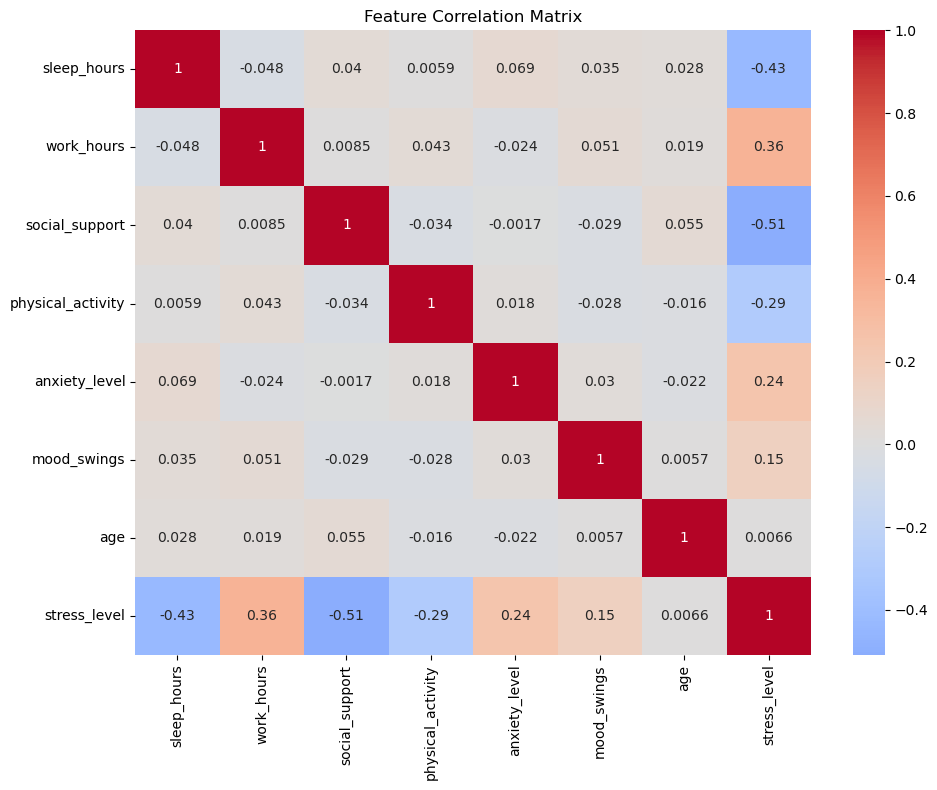

In [12]:
plt.figure(figsize=(10, 8))
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.savefig('correlation_matrix.png')
plt.show()

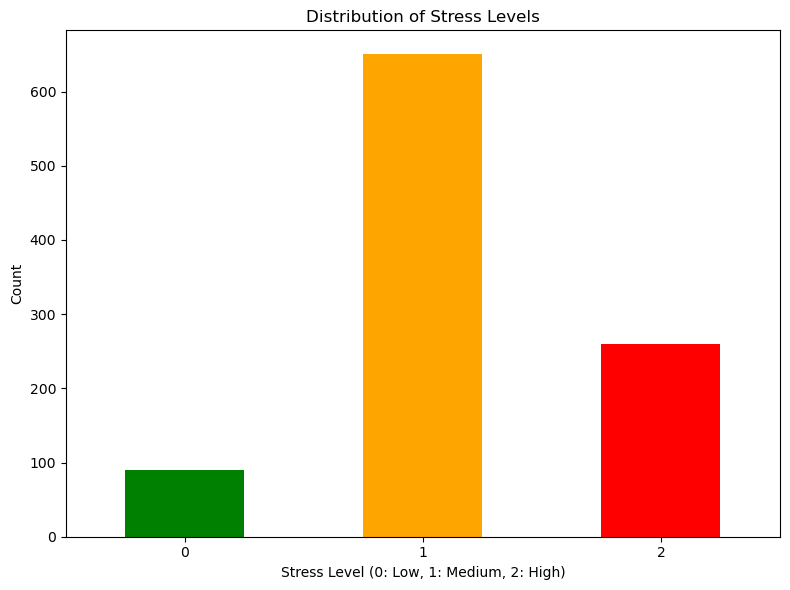

In [13]:
plt.figure(figsize=(8, 6))
df['stress_level'].value_counts().sort_index().plot(kind='bar', color=['green', 'orange', 'red'])
plt.title('Distribution of Stress Levels')
plt.xlabel('Stress Level (0: Low, 1: Medium, 2: High)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('stress_distribution.png')
plt.show()

In [14]:
feature_cols = ['sleep_hours', 'work_hours', 'social_support', 
                'physical_activity', 'anxiety_level', 'mood_swings', 'age']
X = df[feature_cols]
y = df['stress_level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_model = LogisticRegression(max_iter=1000, random_state=42, multi_class='multinomial')
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

In [15]:
y_pred = lr_model.predict(X_test_scaled)
print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Low', 'Medium', 'High']))


Accuracy: 0.9550

Classification Report:
              precision    recall  f1-score   support

         Low       1.00      0.78      0.88        18
      Medium       0.94      1.00      0.97       130
        High       1.00      0.90      0.95        52

    accuracy                           0.95       200
   macro avg       0.98      0.89      0.93       200
weighted avg       0.96      0.95      0.95       200



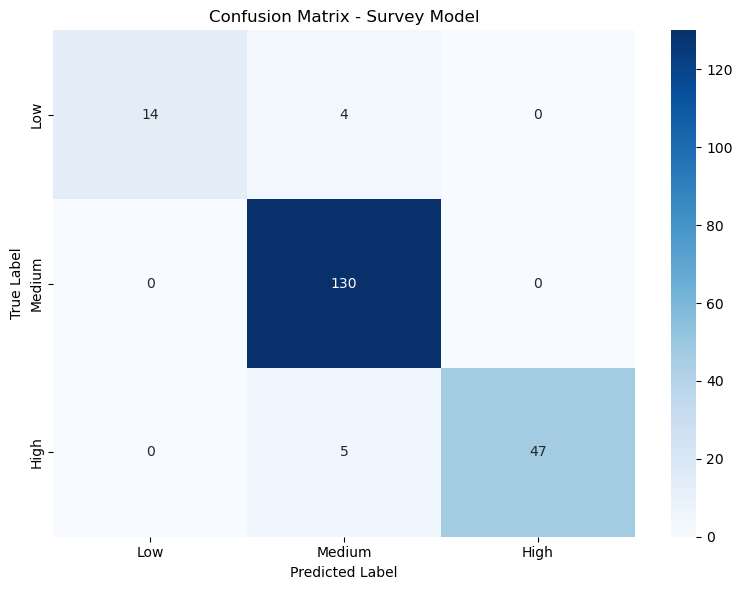

In [16]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix - Survey Model')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig('confusion_matrix_survey.png')
plt.show()

In [17]:
feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': np.abs(lr_model.coef_).mean(axis=0)
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
             feature  importance
2     social_support    2.736033
0        sleep_hours    2.134884
1         work_hours    1.800825
3  physical_activity    1.686776
4      anxiety_level    1.398716
5        mood_swings    0.780732
6                age    0.046179


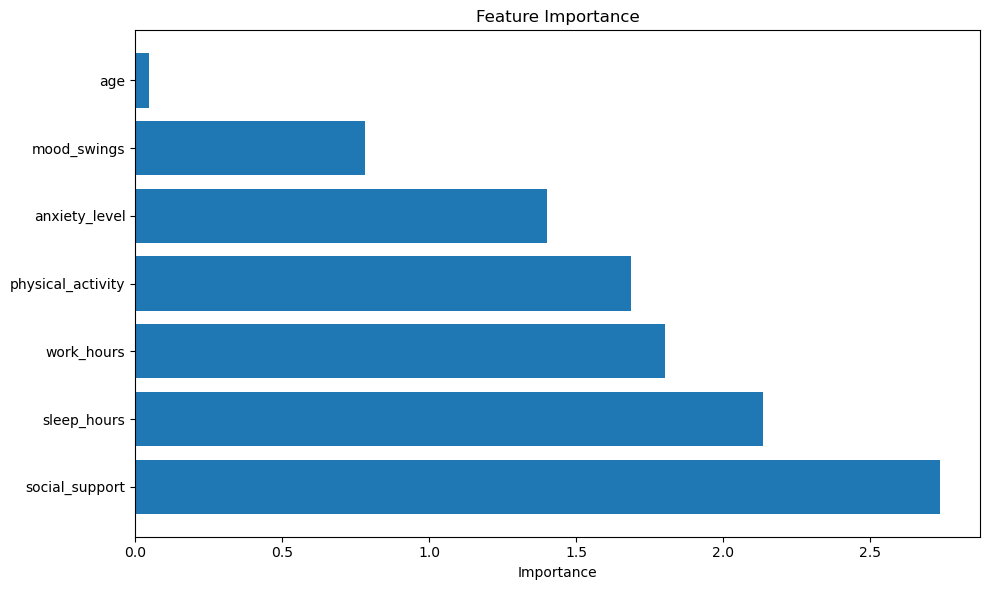

In [18]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

In [19]:
with open('stress_model.pkl', 'wb') as f:
    pickle.dump(lr_model, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("\nSurvey model and scaler saved!")


Survey model and scaler saved!


In [20]:
print("MODEL 2: TEXT-BASED PREDICTION")
X_text = df['text_response']
y_text = df['stress_level']
X_text_train, X_text_test, y_text_train, y_text_test = train_test_split(
    X_text, y_text, test_size=0.2, random_state=42, stratify=y_text
)
vectorizer = TfidfVectorizer(max_features=100, stop_words='english')
X_text_train_vec = vectorizer.fit_transform(X_text_train)
X_text_test_vec = vectorizer.transform(X_text_test)
text_model = LogisticRegression(max_iter=1000, random_state=42, multi_class='multinomial')
text_model.fit(X_text_train_vec, y_text_train)

MODEL 2: TEXT-BASED PREDICTION


LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

In [21]:
y_text_pred = text_model.predict(X_text_test_vec)
print(f"\nAccuracy: {accuracy_score(y_text_test, y_text_pred):.4f}")
print(f"\nClassification Report:")
print(classification_report(y_text_test, y_text_pred, target_names=['Low', 'Medium', 'High']))


Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00        18
      Medium       1.00      1.00      1.00       130
        High       1.00      1.00      1.00        52

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [22]:
with open('text_model.pkl', 'wb') as f:
    pickle.dump(text_model, f)

with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

print("\nText model and vectorizer saved!")


Text model and vectorizer saved!


In [24]:
print("TESTING PREDICTIONS")
test_survey = np.array([[6, 9, 5, 2, 8, 7, 30]])
test_survey_scaled = scaler.transform(test_survey)
survey_prediction = lr_model.predict(test_survey_scaled)[0]
survey_proba = lr_model.predict_proba(test_survey_scaled)[0]

print("\nSurvey Test:")
print(f"Input: Sleep=6h, Work=9h, Social=5, Activity=2h, Anxiety=8, Mood=7, Age=30")
print(f"Predicted Stress Level: {['Low', 'Medium', 'High'][survey_prediction]}")
print(f"Probabilities: Low={survey_proba[0]:.2%}, Medium={survey_proba[1]:.2%}, High={survey_proba[2]:.2%}")

TESTING PREDICTIONS

Survey Test:
Input: Sleep=6h, Work=9h, Social=5, Activity=2h, Anxiety=8, Mood=7, Age=30
Predicted Stress Level: High
Probabilities: Low=0.00%, Medium=5.63%, High=94.37%


C:\Users\AKS\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [25]:
test_text = ["I feel constantly overwhelmed and can't sleep"]
test_text_vec = vectorizer.transform(test_text)
text_prediction = text_model.predict(test_text_vec)[0]
text_proba = text_model.predict_proba(test_text_vec)[0]

print("\nText Test:")
print(f"Input: '{test_text[0]}'")
print(f"Predicted Stress Level: {['Low', 'Medium', 'High'][text_prediction]}")
print(f"Probabilities: Low={text_proba[0]:.2%}, Medium={text_proba[1]:.2%}, High={text_proba[2]:.2%}")


Text Test:
Input: 'I feel constantly overwhelmed and can't sleep'
Predicted Stress Level: Medium
Probabilities: Low=1.96%, Medium=55.04%, High=43.00%
